In [2]:
# Import Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('house.csv')
df.head(5)

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [5]:
df = df[['Price', 'Area', 'Room', 'Lon', 'Lat']]
df['Price'] = df['Price'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   920 non-null    float64
 1   Area    924 non-null    int64  
 2   Room    924 non-null    int64  
 3   Lon     924 non-null    float64
 4   Lat     924 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 36.2 KB


In [7]:
missing_column = df.isna().mean().round(4) * 100
missing_column

Price    0.43
Area     0.00
Room     0.00
Lon      0.00
Lat      0.00
dtype: float64

In [8]:
missing_value = df['Price'].mean()
missing_value

622065.4195652173

In [9]:
df['Price'] = df['Price'].fillna(missing_value)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   924 non-null    float64
 1   Area    924 non-null    int64  
 2   Room    924 non-null    int64  
 3   Lon     924 non-null    float64
 4   Lat     924 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 36.2 KB


In [10]:
df.head(5)

,Price,Area,Room,Lon,Lat
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586
2,850000.0,109,4,4.944774,52.343782
3,580000.0,128,6,4.789928,52.343712
4,720000.0,138,5,4.902503,52.410538


In [11]:
plt.rcParams['figure.figsize'] = (10,8)
sns.set_theme(style="darkgrid")

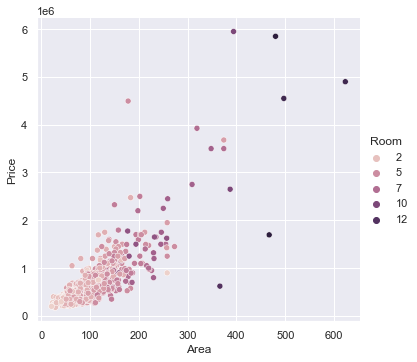

In [12]:
sns.relplot(x="Area", y="Price", hue="Room", data=df)
plt.show()

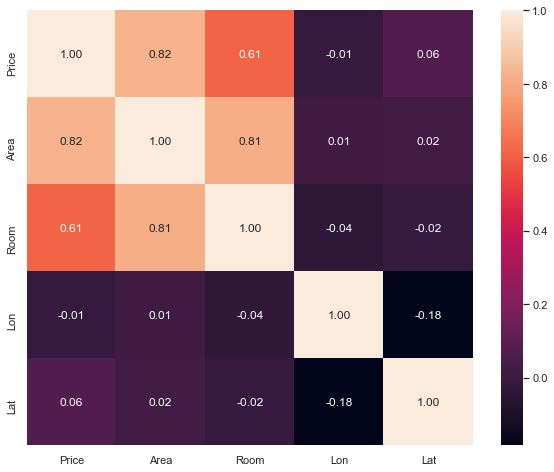

In [13]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [42]:
import plotly.express as px
fig = px.density_mapbox(df, lat='Lat', lon='Lon', z='Price', 
                        radius=20, center=dict(lat=df.Lat.mean(), 
                                              lon=df.Lon.mean()),
                       zoom=10, 
                       mapbox_style="open-street-map",
                       height=500)

fig.show()

In [14]:
X = df[['Area', 'Room', 'Lat','Lon']]
y = df[['Price']]


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

- Linear Regression

In [29]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [22]:
kf = KFold(n_splits=10, shuffle=True, random_state=42) #10 folds
lr = LinearRegression()

In [33]:
cv_scores = []
r2 = []

In [34]:
for train_index, val_index in kf.split(X_train, y_train):
    # split the data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # fit the linear regression model on the training data for this fold
    lr.fit(X_train_fold, y_train_fold)
    
    # evaluate the model on the validation data for this fold
    y_val_pred = lr.predict(X_val_fold)
    mse = mean_squared_error(y_val_fold, y_val_pred)
    r2s = r2_score(y_val_fold, y_val_pred)
    r2.append(r2s)
    rmse = np.sqrt(mse)
    cv_scores.append(rmse)

# calculate the mean CV score
mean_cv_score = np.mean(cv_scores)
mean_r2 = np.mean(r2)

print(cv_scores)
print(mean_cv_score)
print(r2)
print(mean_r2)

[293157.49267620215, 271230.98227279633, 230590.5643259322, 292575.86947557825, 249272.4192728125, 203502.50516634237, 183325.33180308956, 289690.53367225506, 450348.32479444746, 269530.0269773427]
273322.4050436799
[0.7251687052778008, 0.5712739728715217, 0.6633624720971185, 0.6902732191475092, 0.7916217133296817, 0.7677191338787008, 0.8995416779244549, -0.5510838562728464, 0.3344401999270076, 0.6351692098029635]
0.5527486447983911


- Polynomial Regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures

kf = KFold(n_splits=10, shuffle=True, random_state=42) #10 folds

In [47]:
cv_scores_deg1 = []
cv_scores_deg2 = []
cv_scores_deg3 = []
cv_scores_deg4 = []

r2_scores_deg1 = []
r2_scores_deg2 = []
r2_scores_deg3 = []
r2_scores_deg4 = []

for train_index, val_index in kf.split(X_train, y_train):
    # split the data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    poly1 = PolynomialFeatures(degree=1)
    poly2 = PolynomialFeatures(degree=2)
    poly3 = PolynomialFeatures(degree=3)
    poly4 = PolynomialFeatures(degree=4)
    
    # transform the training data for each degree
    X_train_fold_deg1 = poly1.fit_transform(X_train_fold)
    X_train_fold_deg2 = poly2.fit_transform(X_train_fold)
    X_train_fold_deg3 = poly3.fit_transform(X_train_fold)
    X_train_fold_deg4 = poly4.fit_transform(X_train_fold)
    
     # transform the validation data for each degree
    X_val_fold_deg1 = poly1.transform(X_val_fold)
    X_val_fold_deg2 = poly2.transform(X_val_fold)
    X_val_fold_deg3 = poly3.transform(X_val_fold)
    X_val_fold_deg4 = poly4.transform(X_val_fold)
    
     # fit the linear regression model on the training data for each degree
    lr1 = LinearRegression().fit(X_train_fold_deg1, y_train_fold)
    lr2 = LinearRegression().fit(X_train_fold_deg2, y_train_fold)
    lr3 = LinearRegression().fit(X_train_fold_deg3, y_train_fold)
    lr4 = LinearRegression().fit(X_train_fold_deg4, y_train_fold)
    
    # evaluate the model on the validation data for each degree
    y_val_pred_deg1 = lr1.predict(X_val_fold_deg1)
    y_val_pred_deg2 = lr2.predict(X_val_fold_deg2)
    y_val_pred_deg3 = lr3.predict(X_val_fold_deg3)
    y_val_pred_deg4 = lr4.predict(X_val_fold_deg4)
    
    mse_deg1 = mean_squared_error(y_val_fold, y_val_pred_deg1)
    mse_deg2 = mean_squared_error(y_val_fold, y_val_pred_deg2)
    mse_deg3 = mean_squared_error(y_val_fold, y_val_pred_deg3)
    mse_deg4 = mean_squared_error(y_val_fold, y_val_pred_deg4)

    # store the mean squared error for each degree
    cv_scores_deg1.append(mse_deg1)
    cv_scores_deg2.append(mse_deg2)
    cv_scores_deg3.append(mse_deg3)
    cv_scores_deg4.append(mse_deg4)
    
    # coefficient of determination
    r2_deg1 = r2_score(y_val_fold, y_val_pred_deg1)
    r2_deg2 = r2_score(y_val_fold, y_val_pred_deg2)
    r2_deg3 = r2_score(y_val_fold, y_val_pred_deg3)
    r2_deg4 = r2_score(y_val_fold, y_val_pred_deg4)
    
    # store the mean squared error for each degree
    r2_scores_deg1.append(r2_deg1)
    r2_scores_deg2.append(r2_deg2)
    r2_scores_deg3.append(r2_deg3)
    r2_scores_deg4.append(r2_deg4)

cv_mean_deg1 = np.mean(cv_scores_deg1)
cv_mean_deg2 = np.mean(cv_scores_deg2)
cv_mean_deg3 = np.mean(cv_scores_deg3)
cv_mean_deg4 = np.mean(cv_scores_deg4)

print("CV score for degree 1:", cv_mean_deg1)
print("CV score for degree 2:", cv_mean_deg2)
print("CV score for degree 3:", cv_mean_deg3)
print("CV score for degree 4:", cv_mean_deg4)

r2_mean_deg1 = np.mean(r2_scores_deg1)
r2_mean_deg2 = np.mean(r2_scores_deg2)
r2_mean_deg3 = np.mean(r2_scores_deg3)
r2_mean_deg4 = np.mean(r2_scores_deg4)

print("r2 score for degree 1:", r2_mean_deg1)
print("r2 score for degree 2:", r2_mean_deg2)
print("r2 score for degree 3:", r2_mean_deg3)
print("r2 score for degree 4:", r2_mean_deg4)


CV score for degree 1: 79481904929.91096
CV score for degree 2: 75448291023.45078
CV score for degree 3: 101774310433.55338
CV score for degree 4: 916693788043.324
r2 score for degree 1: 0.5527486447983816
r2 score for degree 2: 0.5658933862672704
r2 score for degree 3: 0.4212754692177336
r2 score for degree 4: -2.717687792899832


- Lasso Regression

In [65]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold

lasso = Lasso(alpha=0.1)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and use neg_mean_squared_error as the scoring metric
cv_scores = cross_val_score(lasso, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
cv_scores = np.sqrt(-cv_scores)  # convert negative mean squared error to RMSE

print("CV scores: ", cv_scores)
print("Mean CV score: ", np.mean(cv_scores))

# perform cross-validation and use R^2 as the scoring metric
r2_scores = cross_val_score(lasso, X_train, y_train, cv=kfold, scoring='r2')

print("R2 scores: ", r2_scores)
print("Mean R2 score: ", np.mean(r2_scores))

CV scores:  [293157.17964204 271231.81059009 230590.70487913 292575.3586812
 249272.0240191  203502.3461879  183326.05906324 289689.4934221
 450348.94250607 269529.81340903]
Mean CV score:  273322.373239989
R2 scores:  [ 0.72516929  0.57127135  0.66336206  0.6902743   0.79162237  0.7677195
  0.89954088 -0.55107272  0.33443837  0.63516979]
Mean R2 score:  0.5527495206021207


In [62]:
from sklearn.linear_model import Ridge

# X_train and y_train are the training data and target labels, respectively
ridge = Ridge(alpha=1.0)  # instantiate Ridge regression with alpha=1.0

kf = KFold(n_splits=10, shuffle=True, random_state=42)  # create 10-fold cross-validator
cv_scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# perform cross-validation and use neg_mean_squared_error as the scoring metric
cv_scores = np.sqrt(-cv_scores)  # convert negative mean squared error to RMSE

print("CV scores: ", cv_scores)
print("Mean CV score: ", np.mean(cv_scores))

# perform cross-validation and use R^2 as the scoring metric
r2_scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='r2')

print("R2 scores: ", r2_scores)
print("Mean R2 score: ", np.mean(r2_scores))

CV scores:  [291773.03021235 274162.24640202 231422.66320019 290687.49085002
 246822.47425652 203421.4250449  186526.90617999 284628.35640424
 452348.2851648  269126.44099813]
Mean CV score:  273091.9318713156
R2 scores:  [ 0.72775841  0.56195719  0.66092854  0.69425847  0.79569763  0.76790419
  0.89600225 -0.49734887  0.32851568  0.63626096]
Mean R2 score:  0.5571934444905874
